# Process the data


### import libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### read in the data

In [12]:
# read in xlsx file
df_weather = pd.read_excel('..\..\data\MC2\\raw\Meteorological_Data.xlsx')
df_sensor = pd.read_excel('..\..\data\MC2\\raw/Sensor_Data.xlsx')

### process the weather data

Interesting finds:

empty row and elevation one value 

only month 4, 8, 12 are present in the weather data

month 8 misses days 1, 2, 3


In [13]:
# drop columns last 2 columns df_weather
df_weather = df_weather.drop(df_weather.columns[[3,4]], axis=1)
# drop empty rows
df_weather = df_weather.dropna()

In [14]:
df_weather.head()


,Date,Wind Direction,Wind Speed (m/s)
0,2016-04-01 00:00:00,190.5,4.0
1,2016-04-01 03:00:00,203.3,5.0
2,2016-04-01 06:00:00,201.1,5.2
3,2016-04-01 09:00:00,204.9,4.1
4,2016-04-01 12:00:00,207.0,3.6


In [15]:
weather_times = df_weather['Date'].unique()

In [16]:
# nr of observations per day
nr_obs = df_weather['Date'].value_counts()
nr_obs

2016-04-01 00:00:00    1
2016-08-18 21:00:00    1
2016-12-02 00:00:00    1
2016-12-02 03:00:00    1
2016-12-02 06:00:00    1
                      ..
2016-04-30 15:00:00    1
2016-04-30 18:00:00    1
2016-04-30 21:00:00    1
2016-08-04 18:00:00    1
2016-12-31 21:00:00    1
Name: Date, Length: 705, dtype: int64

<Axes: xlabel='Date'>

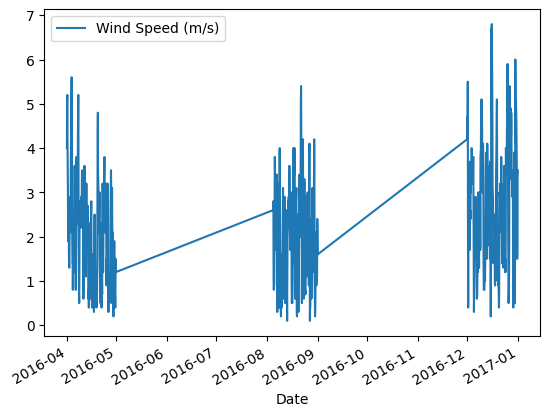

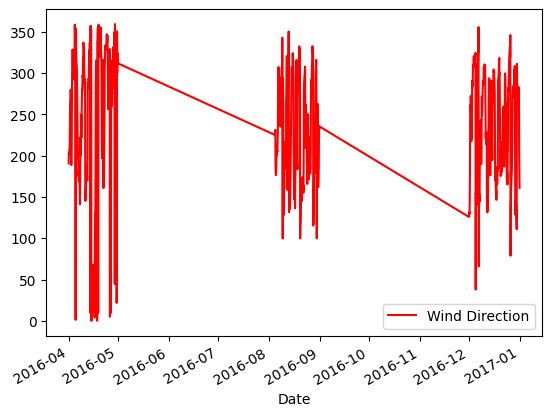

In [17]:
# make line plot of "Wind Speed" and "Wind Direction" over time next to each other
df_weather.plot(x='Date', y=['Wind Speed (m/s)'])
# red line
df_weather.plot(x='Date', y=['Wind Direction'], color='red')

In [18]:
# create three dataframes for the 4th, 8th, and 12th month
df_weather_4 = df_weather[df_weather['Date'].dt.month == 4]
df_weather_8 = df_weather[df_weather['Date'].dt.month == 8]
df_weather_12 = df_weather[df_weather['Date'].dt.month == 12]

In [19]:
# show all the days
df_weather_8['Date'].dt.day.unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=int64)

[Text(1, 0, '4'), Text(2, 0, '8'), Text(3, 0, '12')]

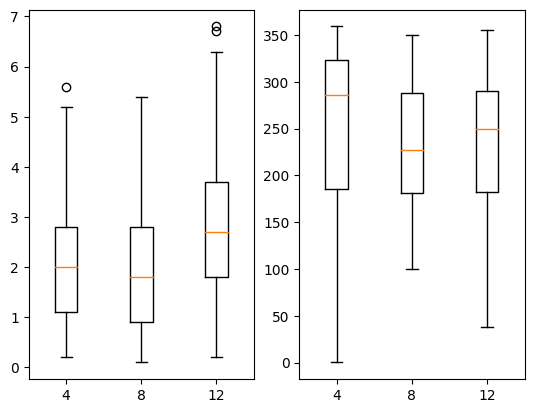

In [20]:
# plot the three dataframes on the same plot with boxplot put the boxplots in one figure next to each other. next to it put the same plot with wind direction
fig, ax = plt.subplots(1, 2)
ax[0].boxplot([df_weather_4['Wind Speed (m/s)'], df_weather_8['Wind Speed (m/s)'], df_weather_12['Wind Speed (m/s)']])
ax[0].set_xticklabels(['4', '8', '12'])
ax[1].boxplot([df_weather_4['Wind Direction'], df_weather_8['Wind Direction'], df_weather_12['Wind Direction']])
ax[1].set_xticklabels(['4', '8', '12'])

<Axes: xlabel='Date'>

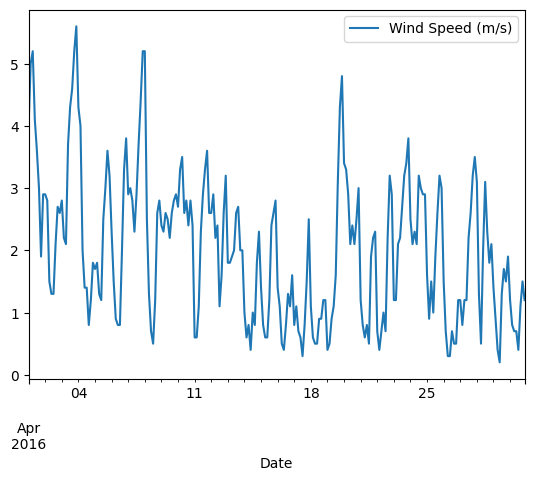

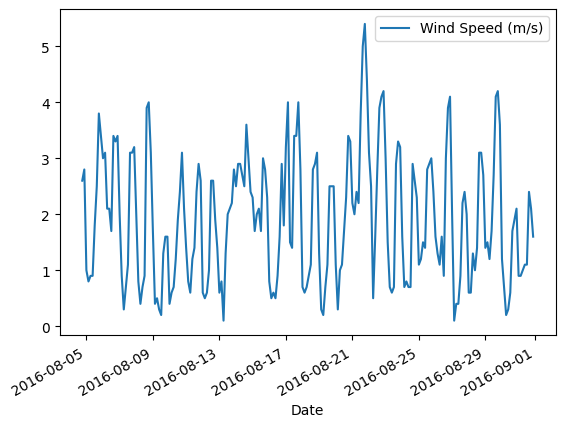

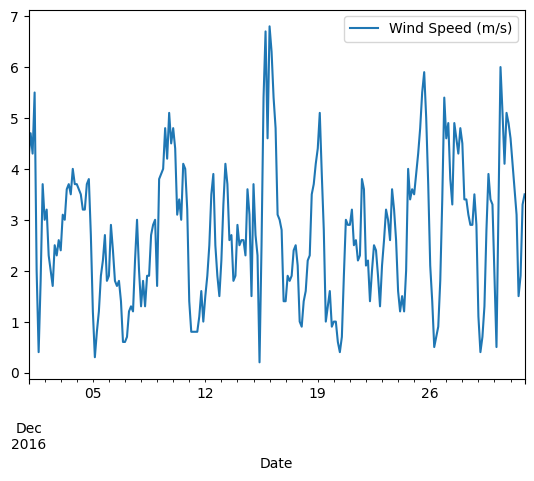

In [21]:
# plot 3 line plots next to each other
df_weather_4.plot(x='Date', y=['Wind Speed (m/s)'])
df_weather_8.plot(x='Date', y=['Wind Speed (m/s)'])
df_weather_12.plot(x='Date', y=['Wind Speed (m/s)'])

In [22]:
df_weather_8

,Date,Wind Direction,Wind Speed (m/s)
240,2016-08-04 18:00:00,225.0,2.6
241,2016-08-04 21:00:00,229.7,2.8
242,2016-08-05 00:00:00,231.1,1.0
243,2016-08-05 03:00:00,187.2,0.8
244,2016-08-05 06:00:00,178.7,0.9
...,...,...,...
453,2016-08-31 09:00:00,185.9,1.1
454,2016-08-31 12:00:00,215.1,1.1
455,2016-08-31 15:00:00,236.0,2.4
456,2016-08-31 18:00:00,232.4,2.1


<Axes: xlabel='Date'>

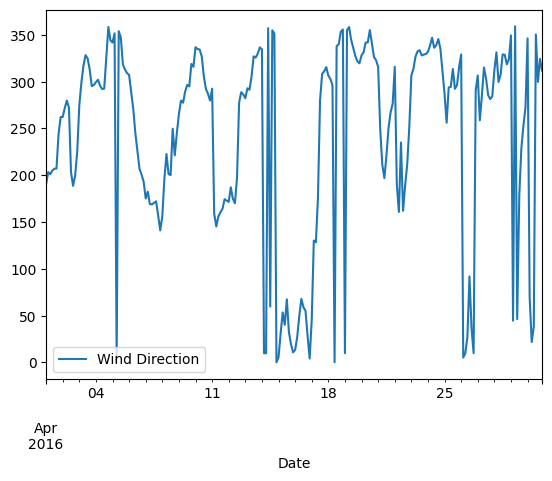

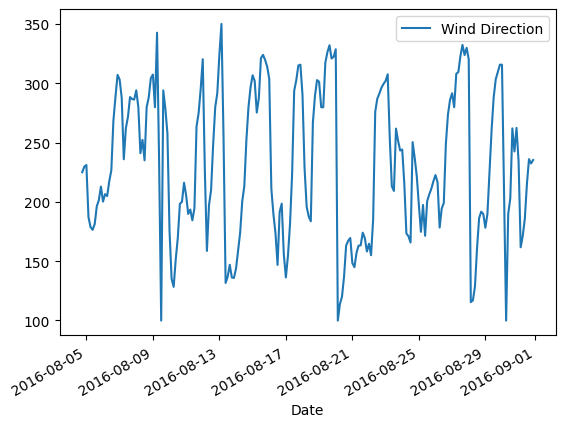

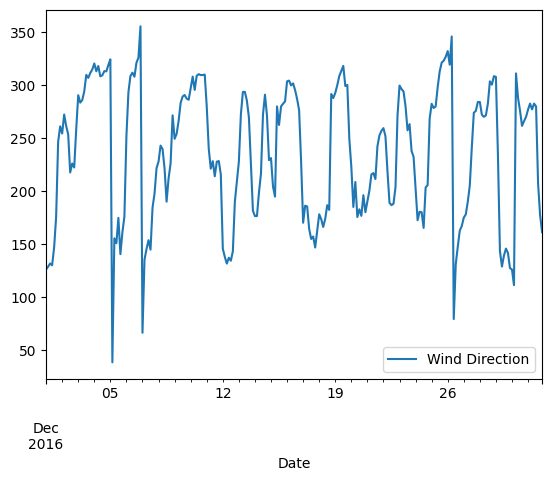

In [23]:
# plot 3 line plots next to each other
df_weather_4.plot(x='Date', y=['Wind Direction'])
df_weather_8.plot(x='Date', y=['Wind Direction'])
df_weather_12.plot(x='Date', y=['Wind Direction'])

### process the sensor data

interesting finds:

only month 4, 8, 12 are present in the sensor data

all months have all days

equal number of occurences for each sensor

equal number of occurences for each chemical

In [24]:
df_sensor = df_sensor.dropna()

In [25]:
df_sensor

,Chemical,Monitor,Date Time,Reading
0,Methylosmolene,3,2016-04-01 00:00:00,2.683820
1,Methylosmolene,7,2016-04-01 00:00:00,2.630640
2,Chlorodinine,3,2016-04-01 00:00:00,1.259170
3,Chlorodinine,7,2016-04-01 00:00:00,0.943983
4,AGOC-3A,3,2016-04-01 00:00:00,0.722303
...,...,...,...,...
79238,AGOC-3A,1,2016-12-31 23:00:00,0.078266
79239,Methylosmolene,3,2016-12-31 23:00:00,0.062784
79240,AGOC-3A,2,2016-12-31 23:00:00,0.060814
79241,Appluimonia,7,2016-12-31 23:00:00,0.039729


In [26]:
df_sensor.columns

Index(['Chemical', 'Monitor', 'Date Time ', 'Reading'], dtype='object')

In [27]:
sensor_times = df_sensor['Date Time '].unique()
chemicals = df_sensor['Chemical'].unique()
monitors = df_sensor['Monitor'].unique()

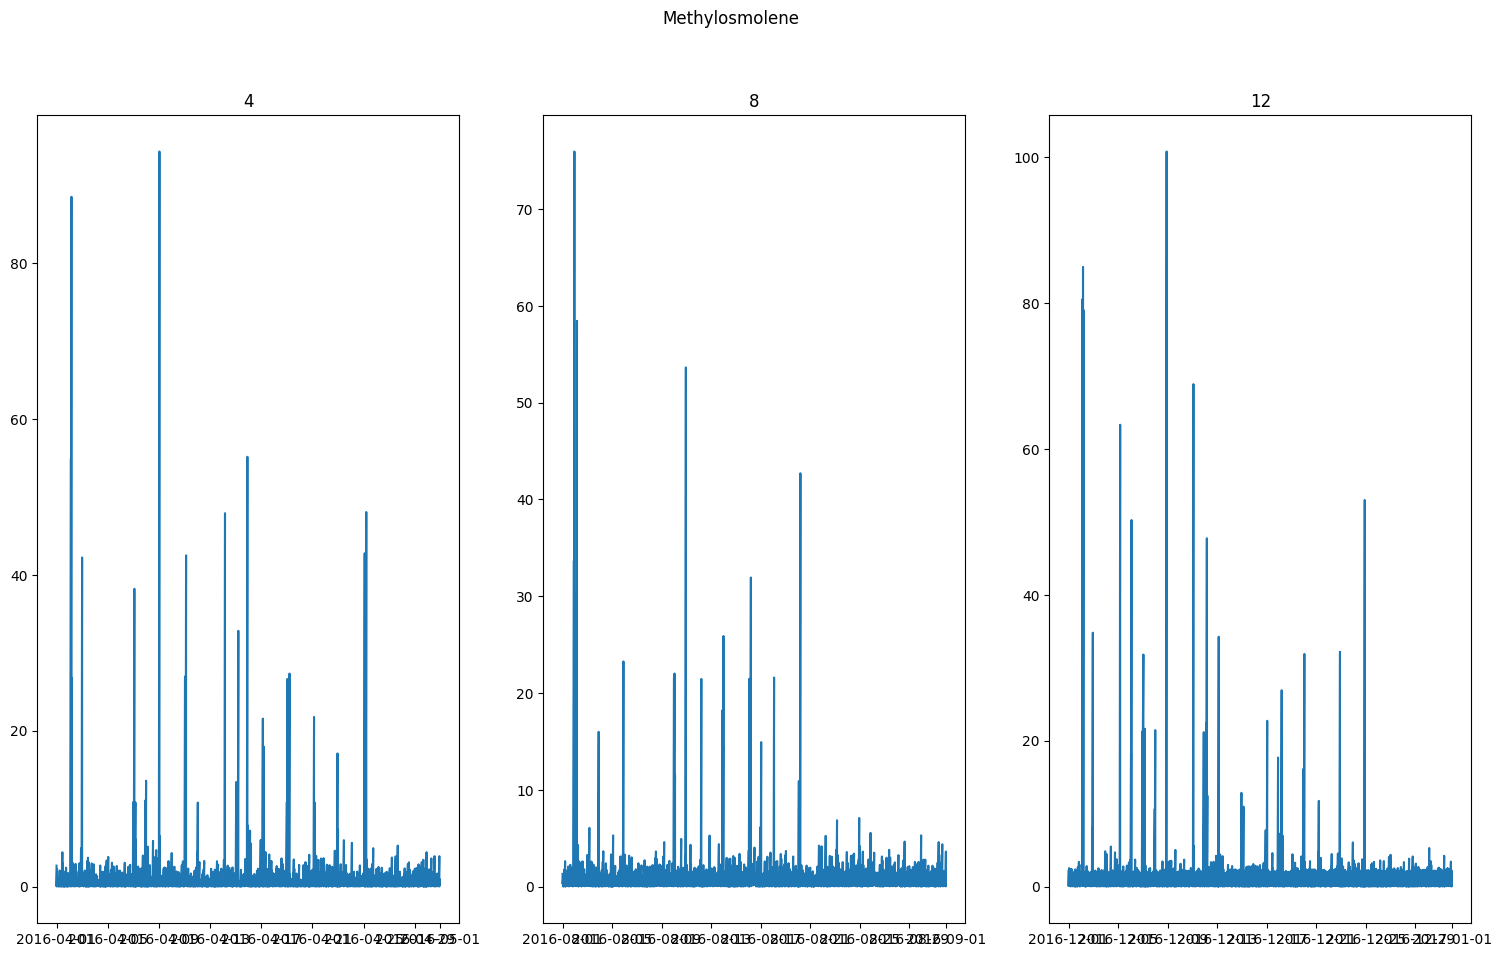

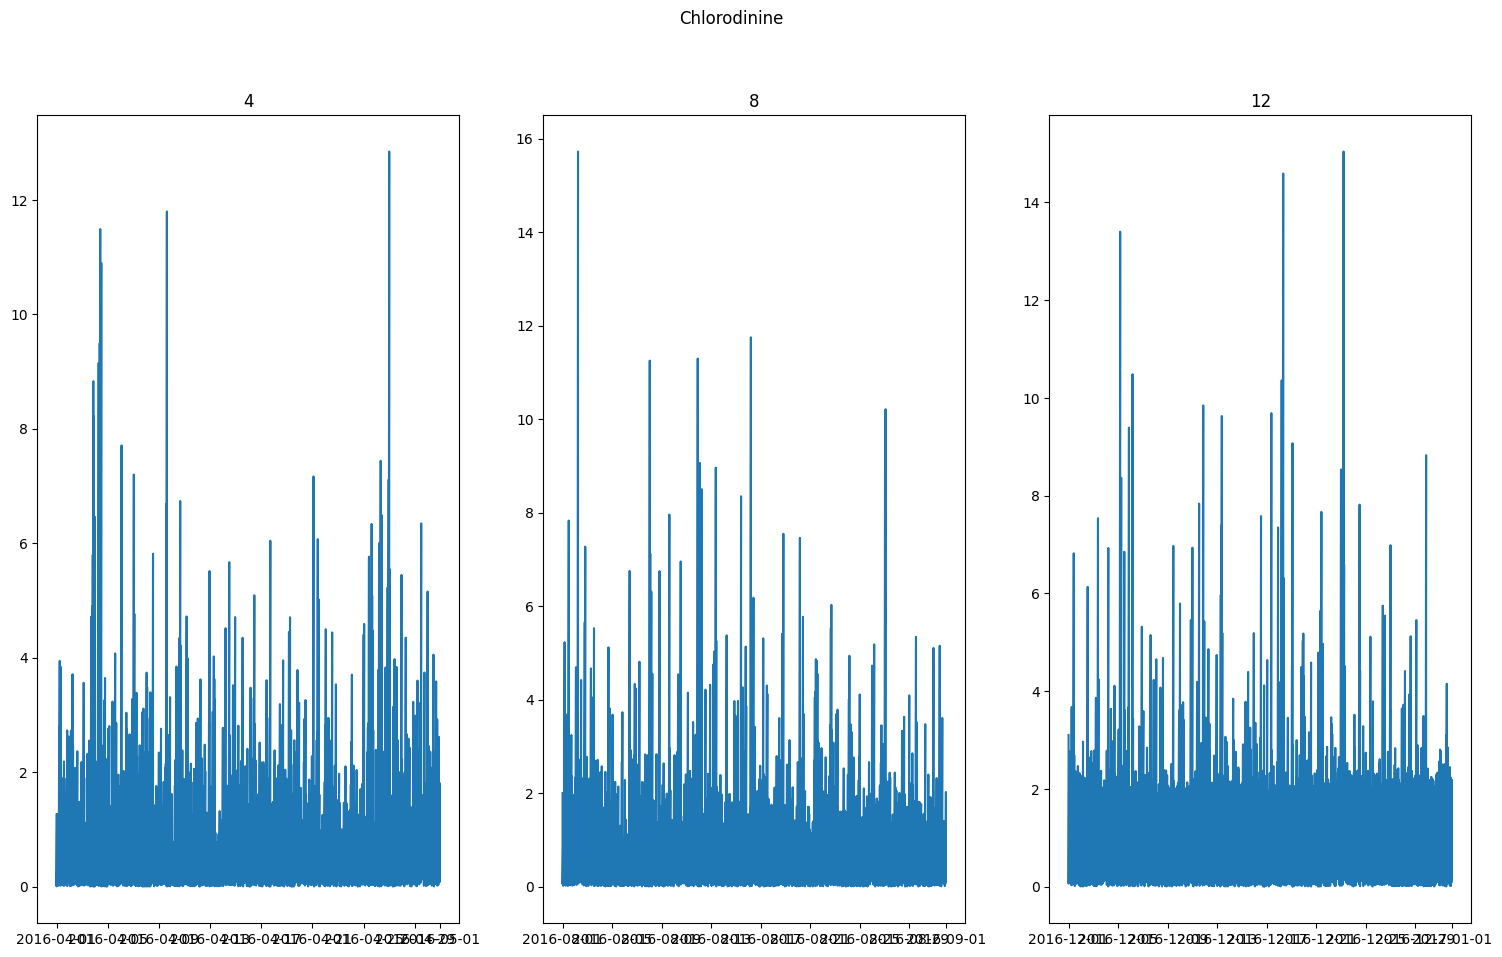

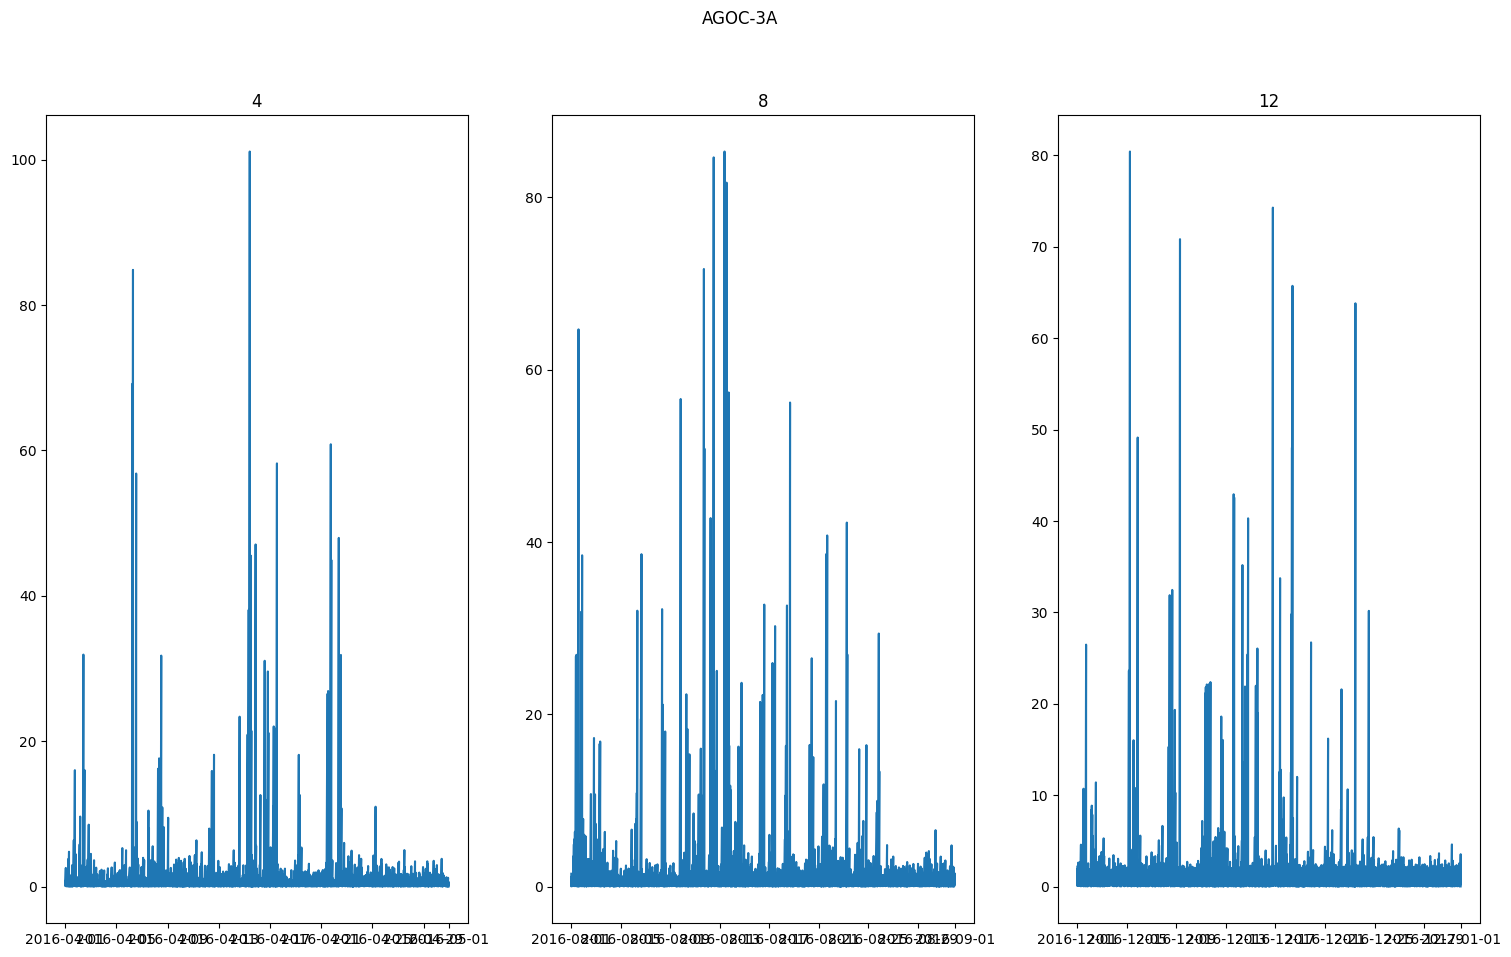

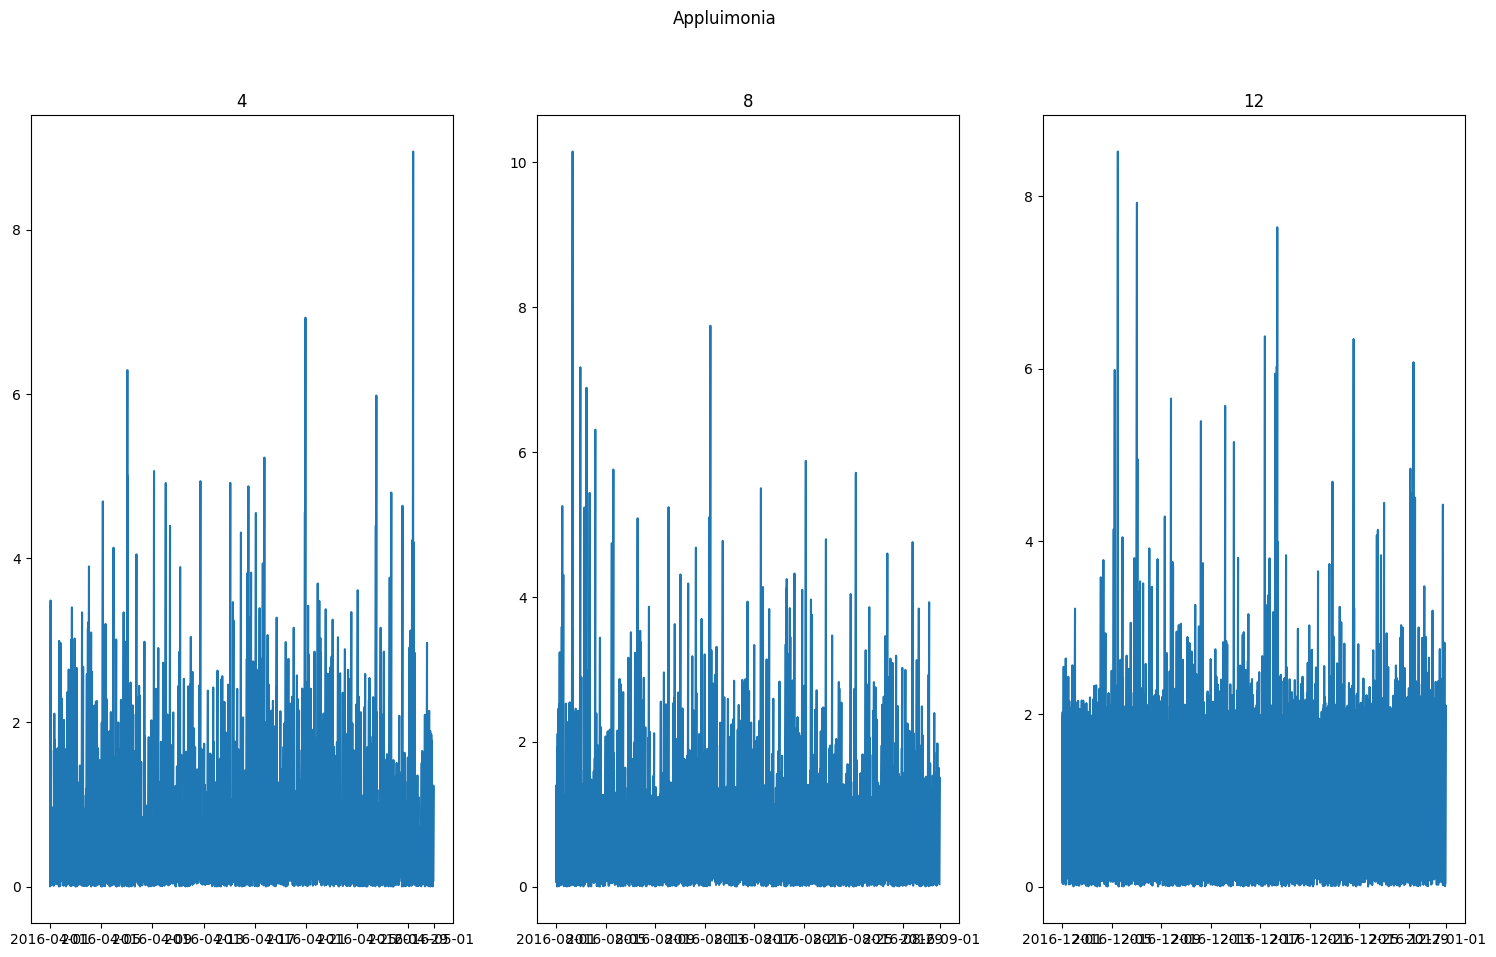

In [28]:
# plot the readings of the chemicals over time with a diferent color for each chemical for each chemical split the data into 3 plots next to eachother for month 4, 8, 12
months = [4, 8, 12]
for chemical in chemicals:
    fig, ax = plt.subplots(1, 3)
    for index, month in enumerate(months):
        df_chemical_month = df_sensor[(df_sensor['Chemical'] == chemical) & (df_sensor['Date Time '].dt.month == month)]
        ax[index].plot(df_chemical_month['Date Time '], df_chemical_month['Reading'])
        ax[index].set_title(str(month))
    # adjust size of figure
    fig.set_size_inches(18.5, 10.5)
    fig.suptitle(chemical)


In [29]:
# create a dataframe for each chemical
df_meth = df_sensor[df_sensor['Chemical'] == chemicals[0]]
df_chlor = df_sensor[df_sensor['Chemical'] == chemicals[1]]
df_agoc = df_sensor[df_sensor['Chemical'] == chemicals[2]]
df_appl = df_sensor[df_sensor['Chemical'] == chemicals[3]]

In [30]:
# give the amount of rows in each dataframe in a list
df_meth.shape[0], df_chlor.shape[0], df_agoc.shape[0], df_appl.shape[0]

(19597, 19809, 20027, 19810)

In [31]:
# give the amount of occurences of each monitot in a list
df_sensor['Chemical'].value_counts()

AGOC-3A           20027
Appluimonia       19810
Chlorodinine      19809
Methylosmolene    19597
Name: Chemical, dtype: int64

In [32]:
df_sensor['Monitor'].value_counts()

3    8806
7    8806
8    8806
6    8805
2    8804
1    8804
4    8804
9    8804
5    8804
Name: Monitor, dtype: int64

<Axes: xlabel='Chemical'>

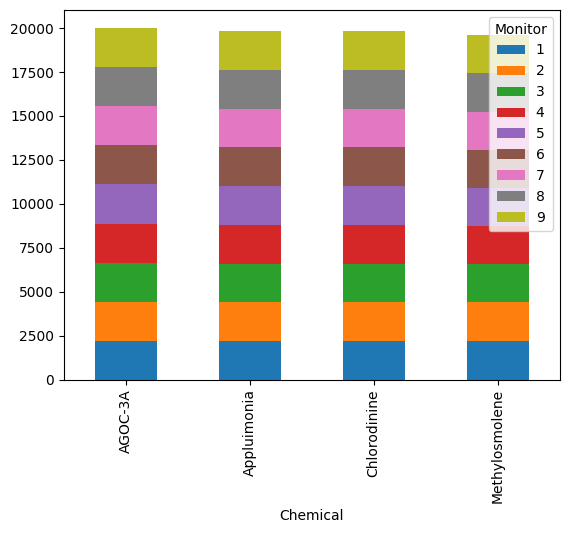

In [33]:
# display the amount of readings for each chemical for each monitor in a bar plot with number count on bars
df_sensor.groupby(['Chemical', 'Monitor']).size().unstack().plot(kind='bar', stacked=True)


In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [35]:
fig = make_subplots(rows=1, cols=len(months), shared_yaxes=True, subplot_titles=months)

for index, month in enumerate(months):
    df = df_sensor[(df_sensor['Chemical'] == chemical) & (df_sensor['Date Time '].dt.month == month)]
    fig.add_trace(go.Scatter(x=df['Date Time '], y=df['Reading'], name=f'{chemical} in {month}'), row=1, col=index+1)


In [36]:
fig.show()